# Importando o Dataset e bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# importando o dataset escolhido
data = pd.read_csv('glass.data', header=None)
del data[0]
data = data.rename(columns={1: 'Ri',2: 'Na',3: 'Mg',4: 'Al',5: 'Si',6: 'K',7: 'Ca',8: 'Ba',9: 'Fe',10: 'Type'})

In [ ]:
# Visualização do dataset
data

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Verificando Dados e Estatísticas

In [ ]:
#Verificação de tipos de dados das colunas
data.info()

In [ ]:
# Número de amostras por tipo
data.Type.value_counts()

In [ ]:
# Gráfico da Distribuição de exemplares
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=data).set_title('Número de Amostras por tipo')
plt.xlabel('Tipo')
plt.ylabel('N° de exemplares')
plt.show()

In [ ]:
# Média das colunas
data.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
DataCopia = data

In [ ]:
datamedia.Ri[1] + datadp.Ri[1]*3

In [ ]:
data2 = data[data['Type']==6]
data2


,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


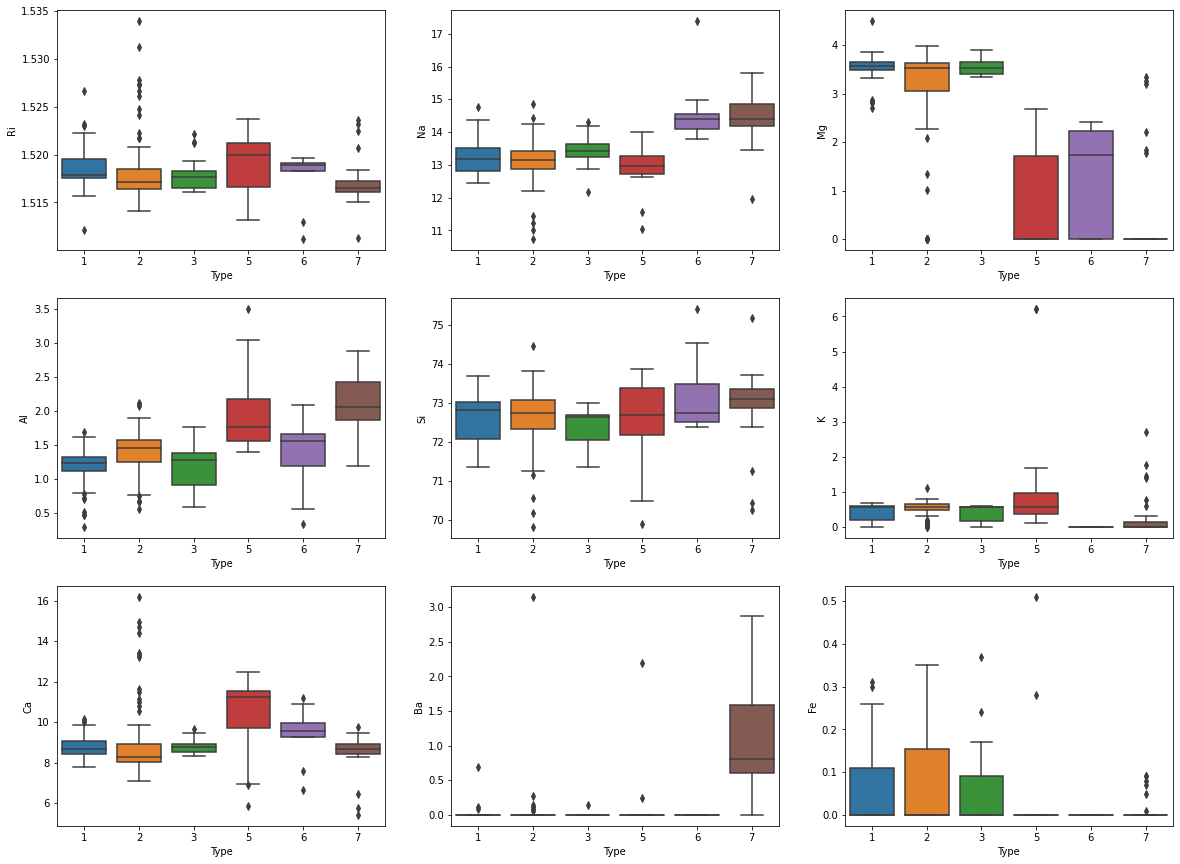

In [ ]:
# Verificação de Outliers
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='Ri', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=data)
plt.show()

In [ ]:
# Média das colunas por Tipo
datamedia =data.groupby('Type',as_index=False).mean()
datamedia

,Type,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [ ]:
# Desvio padrão por tipo
datadp = data.groupby('Type',as_index=False).std()
datadp

,Type,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0.002268,0.499301,0.247043,0.273158,0.569484,0.214879,0.574807,0.083838,0.089075
1,2,0.003802,0.664159,1.215661,0.318340,0.724573,0.213726,1.921635,0.362340,0.106433
2,3,0.001916,0.506887,0.162786,0.347489,0.512276,0.229890,0.380111,0.036380,0.107864
3,5,0.003345,0.777037,0.999146,0.693920,1.282319,2.138695,2.183791,0.608251,0.155588
4,6,0.003116,1.084020,1.097134,0.571861,1.079467,0.000000,1.449948,0.000000,0.000000
5,7,0.002545,0.686359,1.117683,0.442726,0.940234,0.668493,0.973505,0.665341,0.029794


In [ ]:
#Limpando Outliers
colunas = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for n in range(1,8):
  if n == 4:
    pass
  else:
    for coluna in colunas:
      data1 = data[data['Type']==n]
      dif = data1[f'{coluna}'].quantile(0.75) - data1[f'{coluna}'].quantile(0.25)
      remove = data1[data1[f'{coluna}'] > (data1[f'{coluna}'].quantile(0.75) + dif * 1.5)]
      data_pruned = data.drop(remove.index)
data_pruned

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


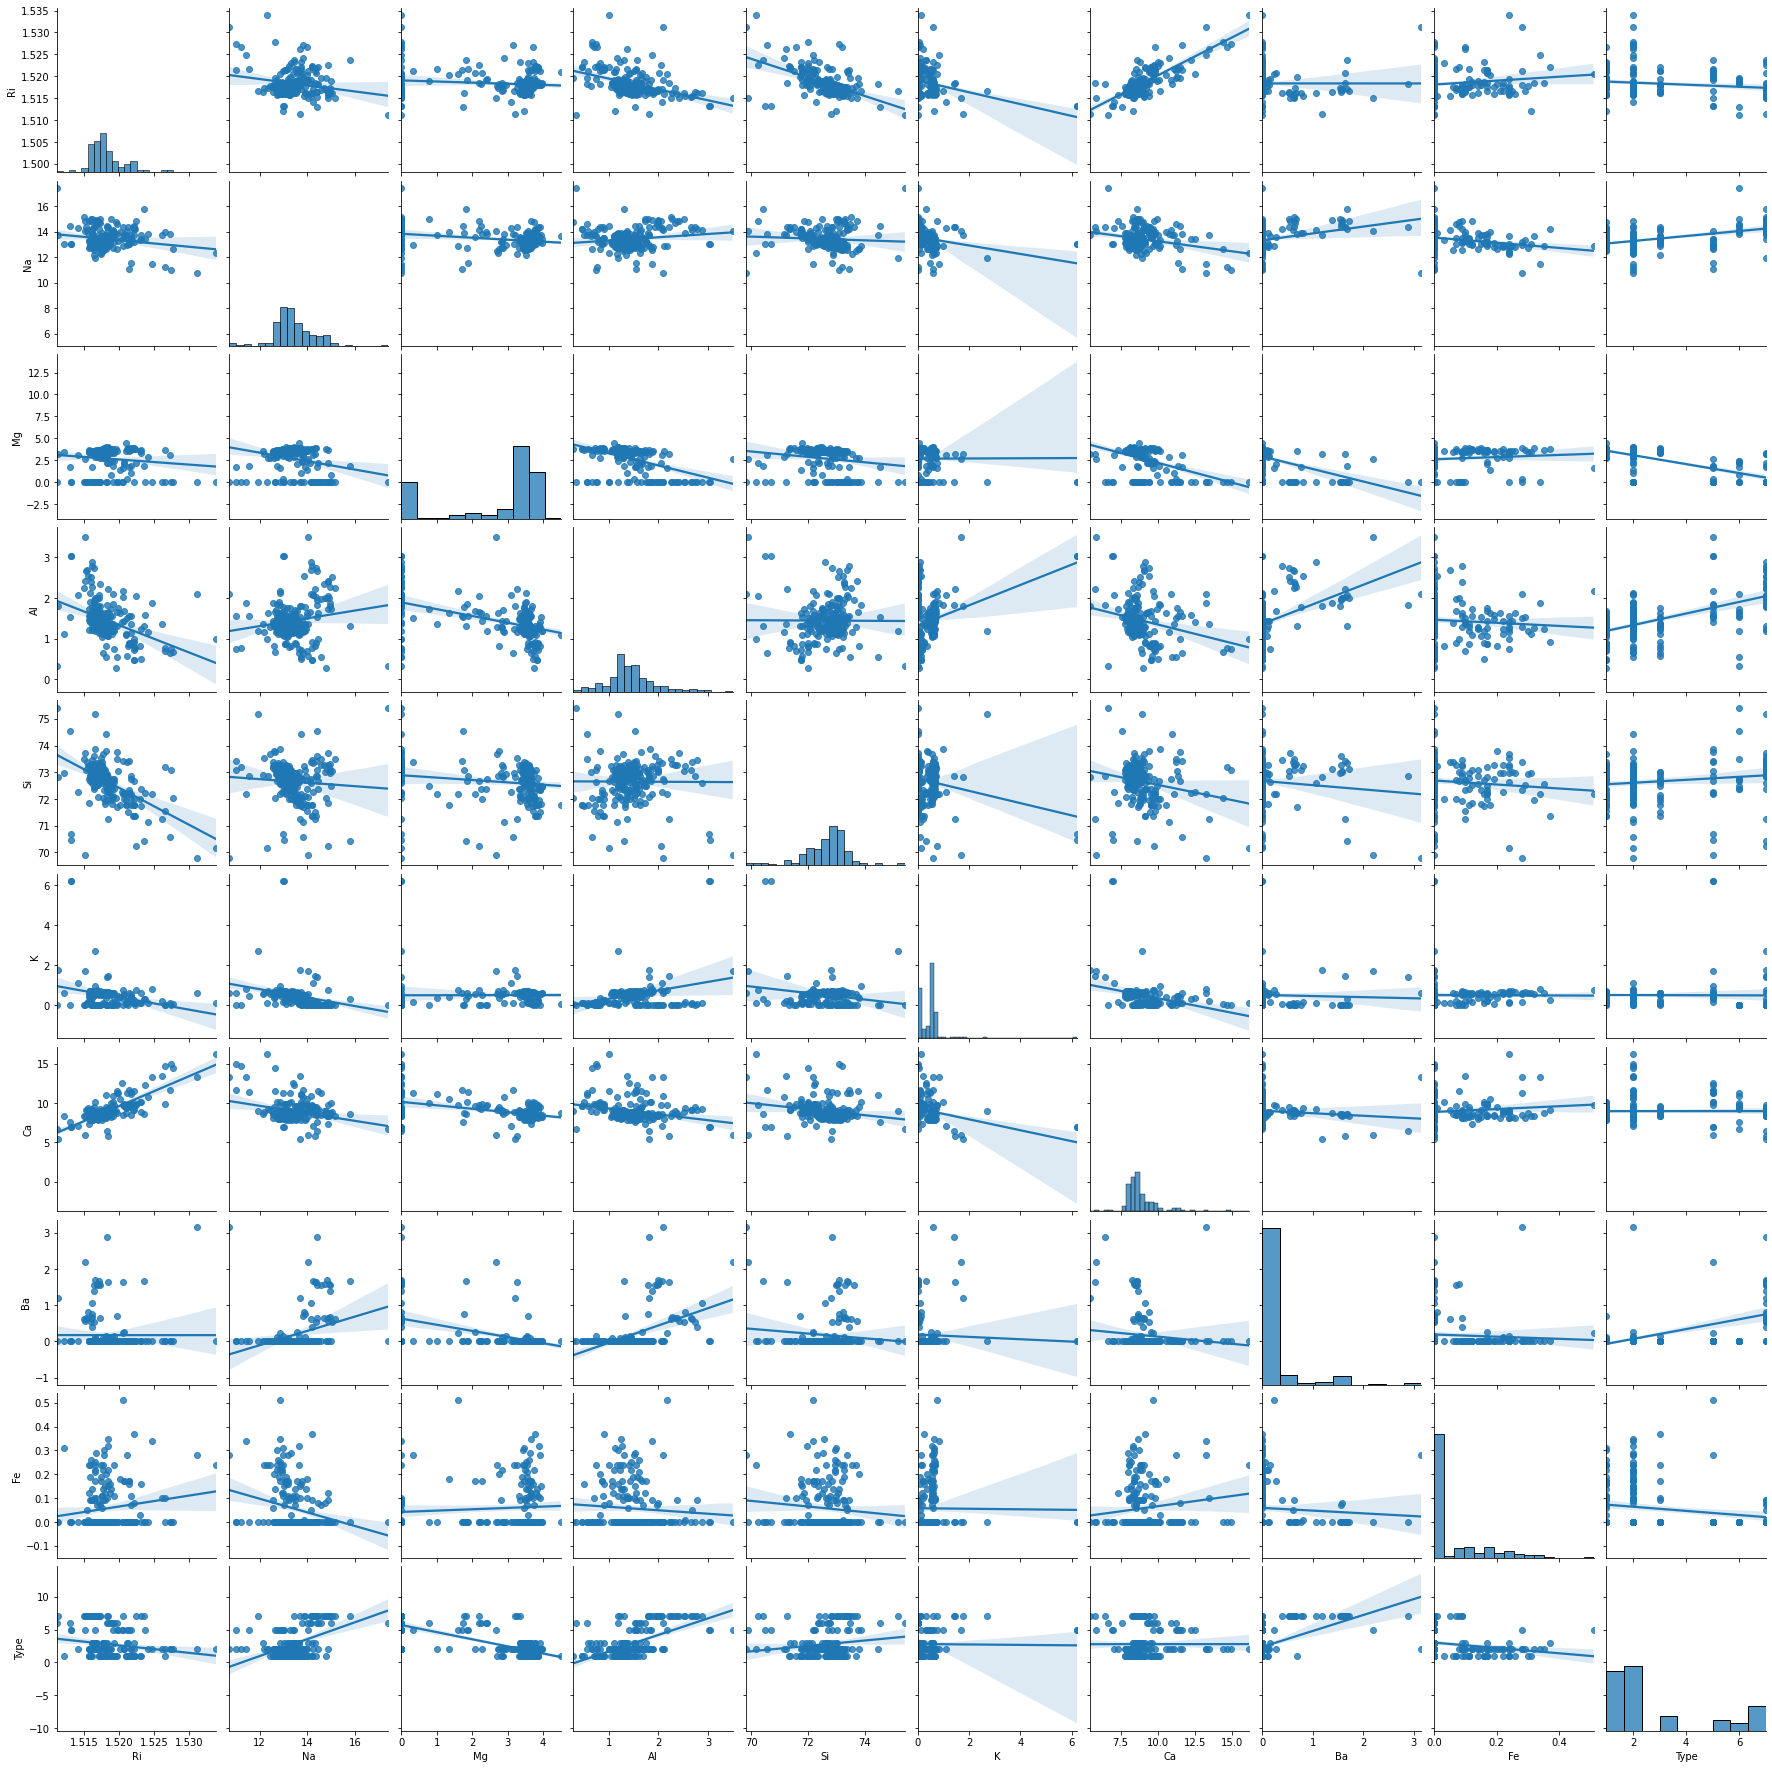

In [ ]:
#Pairplot pra encontrar relações lineares
sns.pairplot(data=data, kind = 'reg')

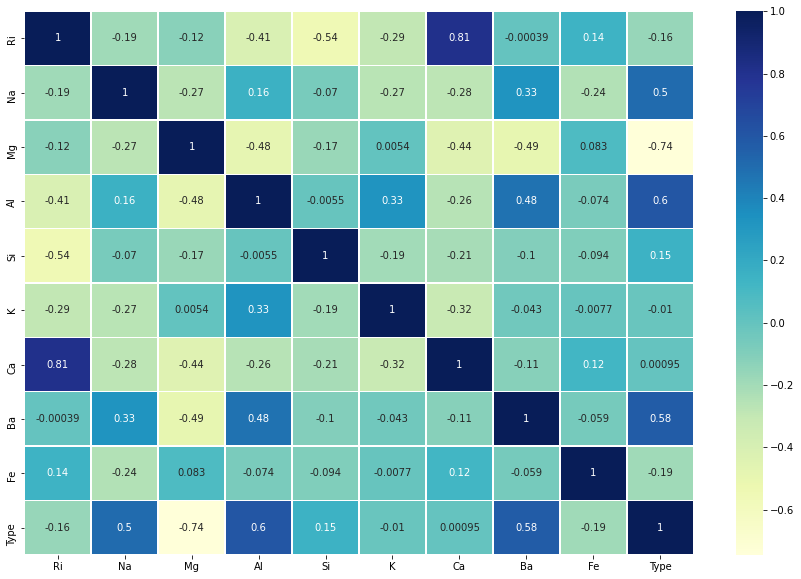

In [ ]:
#Heatmap do pairplot
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=0.5)
plt.show()

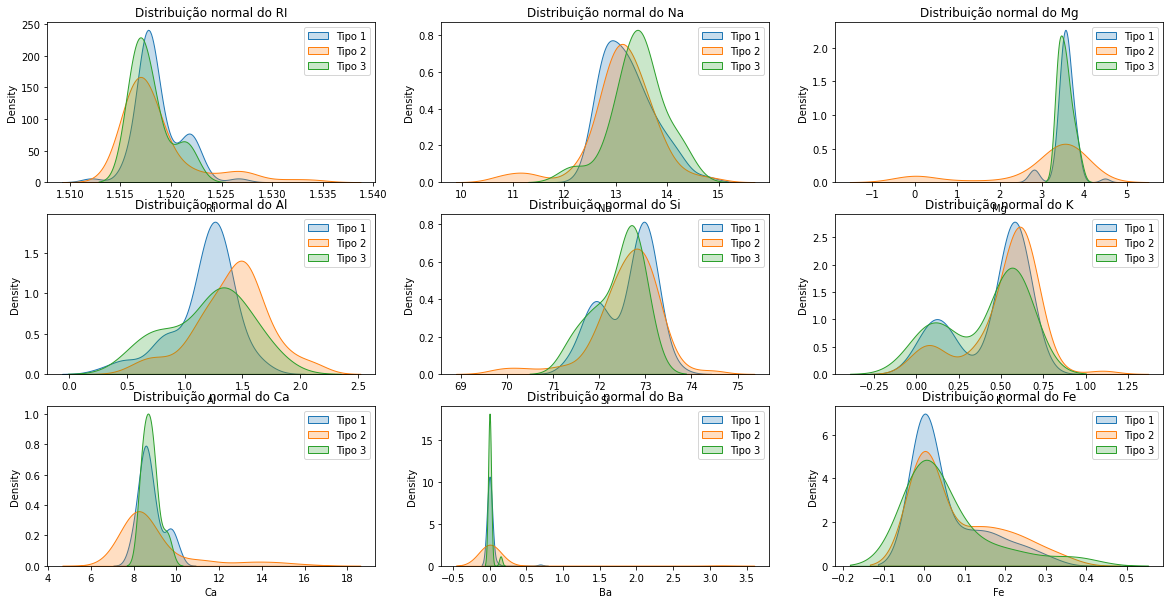

In [ ]:
#Distribuição Normal dos tipos 1,2 e 3
plt.subplots(figsize = (20,10))
plt.subplot(3,3,1)
sns.kdeplot(data["Ri"][data.Type == 1], shade = True)
sns.kdeplot(data["Ri"][data.Type == 2], shade = True)
sns.kdeplot(data["Ri"][data.Type == 3], shade = True)
plt.title("Distribuição normal do RI")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,2)
sns.kdeplot(data["Na"][data.Type == 1], shade = True)
sns.kdeplot(data["Na"][data.Type == 2], shade = True)
sns.kdeplot(data["Na"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Na")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,3)
sns.kdeplot(data["Mg"][data.Type == 1], shade = True)
sns.kdeplot(data["Mg"][data.Type == 2], shade = True)
sns.kdeplot(data["Mg"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Mg")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,4)
sns.kdeplot(data["Al"][data.Type == 1], shade = True)
sns.kdeplot(data["Al"][data.Type == 2], shade = True)
sns.kdeplot(data["Al"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Al")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,5)
sns.kdeplot(data["Si"][data.Type == 1], shade = True)
sns.kdeplot(data["Si"][data.Type == 2], shade = True)
sns.kdeplot(data["Si"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Si")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,6)
sns.kdeplot(data["K"][data.Type == 1], shade = True)
sns.kdeplot(data["K"][data.Type == 2], shade = True)
sns.kdeplot(data["K"][data.Type == 3], shade = True)
plt.title("Distribuição normal do K")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,7)
sns.kdeplot(data["Ca"][data.Type == 1], shade = True)
sns.kdeplot(data["Ca"][data.Type == 2], shade = True)
sns.kdeplot(data["Ca"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Ca")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,8)
sns.kdeplot(data["Ba"][data.Type == 1], shade = True)
sns.kdeplot(data["Ba"][data.Type == 2], shade = True)
sns.kdeplot(data["Ba"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Ba")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,9)
sns.kdeplot(data["Fe"][data.Type == 1], shade = True)
sns.kdeplot(data["Fe"][data.Type == 2], shade = True)
sns.kdeplot(data["Fe"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Fe")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])

# Algoritmo KNN

In [ ]:
classes = data.pop('Type')
classes

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
dados = data
dados

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
lista = []
for z in range(0,10000):
  dados_train, dados_test, classes_train, classes_test = train_test_split(dados, classes, test_size = 0.2, random_state = z,stratify= classes)
  lista1= []
  for a in range(1,16,2):
    model = KNeighborsClassifier(n_neighbors= a )
    model.fit(dados_train, classes_train)
    score = round(model.score(dados_test, classes_test)*100,2)
    lista1.append(score)
  lista.append(lista1)

print(lista.index(max(lista)))
print(max(lista).index(max(max(lista)))+1)



9917
1


In [ ]:

lista3= []
for z in range(0,1000):
  dados_train, dados_test, classes_train, classes_test = train_test_split(dados, classes, test_size = 0.2, random_state = z,stratify= classes)
  lista1= []
  for a in range(1,16,2):
    model = KNeighborsClassifier(n_neighbors= a )
    model.fit(dados_train, classes_train)
    score = round(model.score(dados_test, classes_test)*100,2)
    lista3.append(round(score,1))



In [ ]:
dflista3 = pd.DataFrame(lista3)

In [ ]:
dflista3.mean()

0    65.573887
dtype: float64

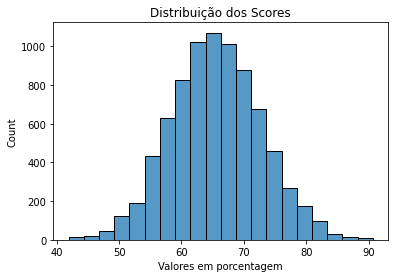

In [ ]:
lista3.sort()
sns.histplot(data=lista3,bins=20)
plt.title('Distribuição dos Scores')
plt.xlabel('Valores em porcentagem')
plt.show()


In [ ]:
dados_train, dados_test, classes_train, classes_test = train_test_split(dados, classes, test_size = 0.2, random_state = 9917, stratify = classes)

In [ ]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(dados_train, classes_train)
print(f'{model.score(dados_test, classes_test)*100}%')

93.02325581395348%


In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
train = model.fit(dados_train, classes_train)
test = model.score(dados_test, classes_test)

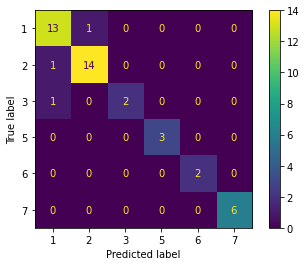

In [ ]:
cm = confusion_matrix(classes_test, model.predict(dados_test))
plot_confusion_matrix(model, dados_test, classes_test)
plt.show()

In [ ]:
predicted = model.predict(dados_test)
print(classification_report(classes_test,predicted))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.93      0.93      0.93        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.93      0.93      0.93        43

